In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os, shutil

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 629F-1AA2

 Directory of C:\Users\Ayaz\Desktop\Desktop_Folders\Projects\Waste_Screening

14-05-2020  18:14    <DIR>          .
14-05-2020  18:14    <DIR>          ..
14-05-2020  18:14    <DIR>          .ipynb_checkpoints
14-05-2020  18:04    <DIR>          annot_rifles
14-05-2020  04:29             1,999 annotate.py
14-05-2020  17:13    <DIR>          darkflow-master
14-05-2020  04:28             1,981 generate_xml.py
14-05-2020  18:14             7,903 image_analysis.ipynb
13-05-2020  17:50       280,176,630 split_dataset.zip
13-05-2020  19:15            49,070 test1.PNG
13-05-2020  20:24            46,685 test2.PNG
14-05-2020  18:10    <DIR>          waste
               6 File(s)    280,284,268 bytes
               6 Dir(s)  385,037,967,360 bytes free


In [3]:
dataset_path = r'C:/Users/Ayaz/Desktop/Desktop_Folders/Projects/Waste_Screening/waste'
folder_names = []
folder_names = [f for f in sorted(os.listdir(dataset_path))]

print(len(folder_names))

8


In [4]:
folder_names

['automatic_rifles',
 'band-aid',
 'boots',
 'bottles',
 'bullet_shells',
 'knives',
 'pistol_revolver',
 'syringes']

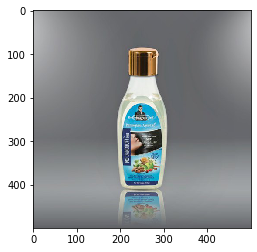

In [5]:
image_path = dataset_path + r'/bottles/img (5).jpg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

In [6]:
print(image.shape)

(500, 500, 3)


In [7]:
categories_num = 8
images_number = 9
categories_selected = np.random.randint(0, 8, categories_num, dtype='l')

print('Selected categories:')
print([folder_names[i] for i in categories_selected])

Selected categories:
['pistol_revolver', 'syringes', 'knives', 'bullet_shells', 'bullet_shells', 'pistol_revolver', 'bottles', 'band-aid']


# Image plotting

C:\Users\Ayaz\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


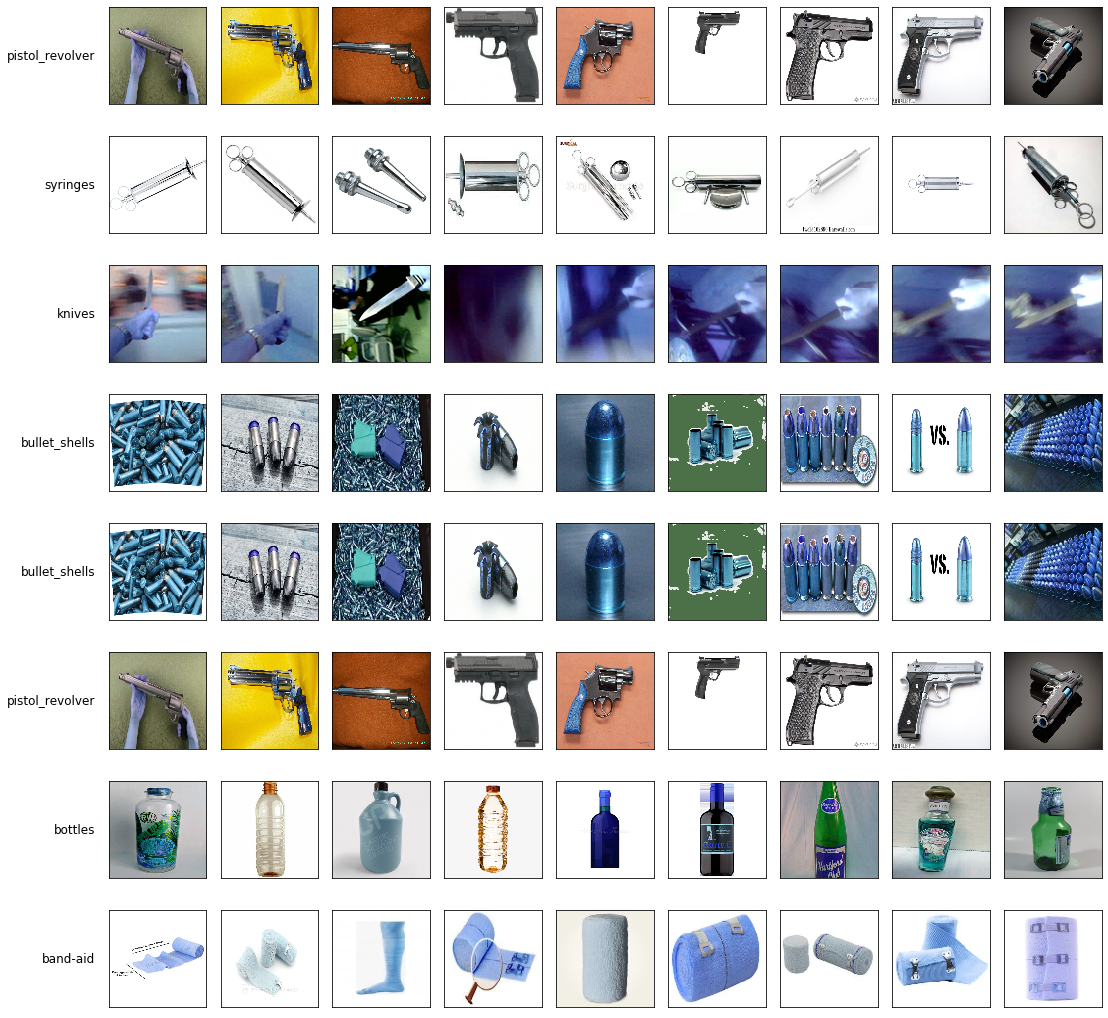

In [8]:
fig, ax = plt.subplots(nrows=8, ncols=9)
fig.set_size_inches(15.5, 14.5)

fig.subplots_adjust(wspace=0.1,hspace=0.1)

for i, category in enumerate(categories_selected):
    folder_path = dataset_path + '/' + folder_names[category]
    # take the first objects
    image_names = [img for img in sorted(os.listdir(folder_path))][:images_number]
    
    for j, image_name in enumerate(image_names):
        image_path = folder_path + '/' + image_name
        image = cv2.imread(image_path)
        image = cv2.resize(image, (100, 100)) 
        ax[i,j].imshow(image)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
        if j == 0:
            pad = 5
            ax[i,j].annotate(folder_names[category], xy=(0, 0.5), xytext=(-ax[i,j].yaxis.labelpad - pad, 0),
                xycoords=ax[i,j].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
fig.tight_layout()
fig.show()

# Images Count

In [9]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

for i, category in enumerate(folder_names):
    category_dict[i] = category
    
    folder_path = dataset_path + '/' + category
    image_names = [img for img in sorted(os.listdir(folder_path))]
    
    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names
    
    print('%s: %d' %(category, images_per_category_dict[i]))
    total_images += images_per_category_dict[i]
    
print('Total images in dataset: %d' %(total_images))

automatic_rifles: 1107
band-aid: 787
boots: 1150
bottles: 1044
bullet_shells: 1011
knives: 1160
pistol_revolver: 921
syringes: 926
Total images in dataset: 8106


# Splitting the data

In [10]:
# directories to use. Run the other cells ONLY ONCE to create the splitting

base_path = './split_dataset'
train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')

In [11]:
# create the directories to use
base_path = './split_dataset'
os.mkdir(base_path)

train_dir = os.path.join(base_path, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_path, 'validation')
os.mkdir(validation_dir)

In [12]:
# create the categories files in each

for directory in [train_dir, validation_dir]:
    for category in folder_names:
        os.mkdir(os.path.join(directory, category))

In [13]:
# calculate the number of images to place in each train/valid/test categories folder

total_train = 0
total_validation = 0

total_train_2 = 0
total_validation_2 = 0

for i, category in enumerate(folder_names):
    train_number = int(0.8 * images_per_category_dict[i])
    validation_number = images_per_category_dict[i] - train_number # for not exceeding maximum number
    
    # for statistics later
    total_train += train_number
    total_validation += validation_number
    
    fnames = category_images_path_dict[i][:train_number]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(train_dir, category, fname)
        shutil.copyfile(src, dst)
        
    total_train_2 += len(fnames)
        
    fnames = category_images_path_dict[i][train_number:train_number + validation_number]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(validation_dir, category, fname)
        shutil.copyfile(src, dst)
        
    total_validation_2 += len(fnames)

In [14]:
# print statistics

print('Correct train split: ', total_train == total_train_2)
print('Correct validation split: ', total_validation == total_validation_2)
print()
print('Number of training images: ', total_train)
print('Number of validation images: ', total_validation)
print()
print('Real percentage of training images: ', total_train / total_images)
print('Real percentage of validation images: ', total_validation / total_images)

Correct train split:  True
Correct validation split:  True

Number of training images:  6481
Number of validation images:  1625

Real percentage of training images:  0.7995312114483099
Real percentage of validation images:  0.20046878855169012
